In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.decomposition import PCA

In [4]:
# reading data into dataframe
CC_GENERAL= pd.read_csv("C:\\Users\\RAMKUMAR\\Desktop\\CC_GENERAL.csv")
CC_GENERAL

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [5]:
CC_GENERAL.to_csv("CC_GENERAL.csv")

In [6]:
CC_GENERAL.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
CC_GENERAL.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [8]:
CC_GENERAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [9]:
CC_GENERAL.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [10]:
CC_GENERAL.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [11]:
CC_GENERAL.describe().T.to_csv("CC_GENERAL.describe().T.csv")

In [12]:
CC_GENERAL.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [13]:
CC_GENERAL.count()

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

In [14]:
CC_GENERAL.dtypes.value_counts()

float64    14
int64       3
object      1
dtype: int64

In [15]:
CC_GENERAL.get_dtype_counts()

float64    14
int64       3
object      1
dtype: int64

# Question-1
 Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:
 Monthly average purchase and cash advance amount
 Purchases by type (one-off, installments)
 Average amount per purchase and cash advance transaction,
 Limit usage (balance to credit limit ratio),
 Payments to minimum payments ratio etc.

In [16]:
CC_GENERAL["Monthly_avg_purchase"] = CC_GENERAL.PURCHASES/CC_GENERAL.TENURE
CC_GENERAL["Monthly_avg_purchase"]
CC_GENERAL

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,124.916667
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,111.106667
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,590.917500
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,36.350000
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,71.790833
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,106.800000


In [17]:
CC_GENERAL["Monthly_CASH_ADVANCE"] = CC_GENERAL.CASH_ADVANCE/CC_GENERAL.TENURE
CC_GENERAL["Monthly_CASH_ADVANCE"]
CC_GENERAL

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_CASH_ADVANCE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,124.916667,17.149001
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,111.106667,0.000000
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,590.917500,0.000000
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,36.350000,0.000000
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,71.790833,0.000000
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,106.800000,0.000000


In [18]:
CC_GENERAL["Purchases_by_type"] = CC_GENERAL.ONEOFF_PURCHASES+CC_GENERAL.INSTALLMENTS_PURCHASES
CC_GENERAL["Purchases_by_type"]
CC_GENERAL

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_CASH_ADVANCE,Purchases_by_type
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,95.40
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.00
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,773.17
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,NaN,0.000000,12,124.916667,17.149001,1499.00
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,16.00
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,0,8,1800.0,1400.057770,2407.246035,0.000000,12,111.106667,0.000000,1333.28
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,...,0,64,13500.0,6354.314328,198.065894,1.000000,12,590.917500,0.000000,7091.01
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,...,0,12,2300.0,679.065082,532.033990,0.000000,12,36.350000,0.000000,436.20
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,...,0,5,7000.0,688.278568,311.963409,0.000000,12,71.790833,0.000000,861.49
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,...,0,3,11000.0,1164.770591,100.302262,0.000000,12,106.800000,0.000000,1281.60


In [19]:
CC_GENERAL["Avg_amt_per_purchase_cash_advance_trx"] = CC_GENERAL.CASH_ADVANCE_TRX + CC_GENERAL.PURCHASES_TRX
CC_GENERAL["Avg_amt_per_purchase_cash_advance_trx"]
CC_GENERAL

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_CASH_ADVANCE,Purchases_by_type,Avg_amt_per_purchase_cash_advance_trx
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,95.40,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.00,4
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,773.17,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,NaN,0.000000,12,124.916667,17.149001,1499.00,2
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,16.00,1
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,8,1800.0,1400.057770,2407.246035,0.000000,12,111.106667,0.000000,1333.28,8
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,...,64,13500.0,6354.314328,198.065894,1.000000,12,590.917500,0.000000,7091.01,64
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,...,12,2300.0,679.065082,532.033990,0.000000,12,36.350000,0.000000,436.20,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,...,5,7000.0,688.278568,311.963409,0.000000,12,71.790833,0.000000,861.49,5
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,...,3,11000.0,1164.770591,100.302262,0.000000,12,106.800000,0.000000,1281.60,3


In [20]:
CC_GENERAL["Limit_usage"] = CC_GENERAL.BALANCE/CC_GENERAL.CREDIT_LIMIT
CC_GENERAL["Limit_usage"]
CC_GENERAL

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_CASH_ADVANCE,Purchases_by_type,Avg_amt_per_purchase_cash_advance_trx,Limit_usage
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,95.40,2,0.040901
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.00,4,0.457495
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,773.17,12,0.332687
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,NaN,0.000000,12,124.916667,17.149001,1499.00,2,0.222223
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,16.00,1,0.681429
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,1800.0,1400.057770,2407.246035,0.000000,12,111.106667,0.000000,1333.28,8,1.005460
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,...,13500.0,6354.314328,198.065894,1.000000,12,590.917500,0.000000,7091.01,64,0.046464
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,...,2300.0,679.065082,532.033990,0.000000,12,36.350000,0.000000,436.20,12,0.792892
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,...,7000.0,688.278568,311.963409,0.000000,12,71.790833,0.000000,861.49,5,0.144989
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,...,11000.0,1164.770591,100.302262,0.000000,12,106.800000,0.000000,1281.60,3,0.013839


In [21]:
CC_GENERAL["Payments_to_minimum_payments_ratio"] = CC_GENERAL.PAYMENTS/CC_GENERAL.MINIMUM_PAYMENTS
CC_GENERAL["Payments_to_minimum_payments_ratio"]
CC_GENERAL

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_CASH_ADVANCE,Purchases_by_type,Avg_amt_per_purchase_cash_advance_trx,Limit_usage,Payments_to_minimum_payments_ratio
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,201.802084,139.509787,0.000000,12,7.950000,0.000000,95.40,2,0.040901,1.446508
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.00,4,0.457495,3.826241
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,622.066742,627.284787,0.000000,12,64.430833,0.000000,773.17,12,0.332687,0.991682
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,0.000000,NaN,0.000000,12,124.916667,17.149001,1499.00,2,0.222223,NaN
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,678.334763,244.791237,0.000000,12,1.333333,0.000000,16.00,1,0.681429,2.771075
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,1400.057770,2407.246035,0.000000,12,111.106667,0.000000,1333.28,8,1.005460,0.581601
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,...,6354.314328,198.065894,1.000000,12,590.917500,0.000000,7091.01,64,0.046464,32.081820
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,...,679.065082,532.033990,0.000000,12,36.350000,0.000000,436.20,12,0.792892,1.276357
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,...,688.278568,311.963409,0.000000,12,71.790833,0.000000,861.49,5,0.144989,2.206280
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,...,1164.770591,100.302262,0.000000,12,106.800000,0.000000,1281.60,3,0.013839,11.612605


In [22]:
conditions = [
    (CC_GENERAL['ONEOFF_PURCHASES'] == 0) & (CC_GENERAL['INSTALLMENTS_PURCHASES'] == 0),
    (CC_GENERAL['ONEOFF_PURCHASES'] > 0) & (CC_GENERAL['INSTALLMENTS_PURCHASES'] == 0),
    (CC_GENERAL['ONEOFF_PURCHASES'] == 0) & (CC_GENERAL['INSTALLMENTS_PURCHASES'] > 0),
     (CC_GENERAL['ONEOFF_PURCHASES'] > 0) & (CC_GENERAL['INSTALLMENTS_PURCHASES'] > 0)]
choices = ['None', 'One_of', 'Installment_Purchases','Both']
CC_GENERAL['Purchases_type'] = np.select(conditions, choices)
CC_GENERAL

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_CASH_ADVANCE,Purchases_by_type,Avg_amt_per_purchase_cash_advance_trx,Limit_usage,Payments_to_minimum_payments_ratio,Purchases_type
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,139.509787,0.000000,12,7.950000,0.000000,95.40,2,0.040901,1.446508,Installment_Purchases
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,1072.340217,0.222222,12,0.000000,536.912124,0.00,4,0.457495,3.826241,None
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,627.284787,0.000000,12,64.430833,0.000000,773.17,12,0.332687,0.991682,One_of
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,NaN,0.000000,12,124.916667,17.149001,1499.00,2,0.222223,NaN,One_of
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,244.791237,0.000000,12,1.333333,0.000000,16.00,1,0.681429,2.771075,One_of
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,2407.246035,0.000000,12,111.106667,0.000000,1333.28,8,1.005460,0.581601,Installment_Purchases
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,...,198.065894,1.000000,12,590.917500,0.000000,7091.01,64,0.046464,32.081820,Both
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,...,532.033990,0.000000,12,36.350000,0.000000,436.20,12,0.792892,1.276357,Installment_Purchases
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,...,311.963409,0.000000,12,71.790833,0.000000,861.49,5,0.144989,2.206280,Both
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,...,100.302262,0.000000,12,106.800000,0.000000,1281.60,3,0.013839,11.612605,One_of


In [23]:
for CUST_ID in CC_GENERAL.columns:
    if(CC_GENERAL[CUST_ID].dtype == 'object'):
        CC_GENERAL[CUST_ID]= CC_GENERAL[CUST_ID].astype('category')
        CC_GENERAL[CUST_ID] = CC_GENERAL[CUST_ID].cat.codes

In [24]:
CC_GENERAL

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_CASH_ADVANCE,Purchases_by_type,Avg_amt_per_purchase_cash_advance_trx,Limit_usage,Payments_to_minimum_payments_ratio,Purchases_type
0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,139.509787,0.000000,12,7.950000,0.000000,95.40,2,0.040901,1.446508,1
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,1072.340217,0.222222,12,0.000000,536.912124,0.00,4,0.457495,3.826241,2
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,627.284787,0.000000,12,64.430833,0.000000,773.17,12,0.332687,0.991682,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,NaN,0.000000,12,124.916667,17.149001,1499.00,2,0.222223,NaN,3
4,4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,244.791237,0.000000,12,1.333333,0.000000,16.00,1,0.681429,2.771075,3
5,5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,2407.246035,0.000000,12,111.106667,0.000000,1333.28,8,1.005460,0.581601,1
6,6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,...,198.065894,1.000000,12,590.917500,0.000000,7091.01,64,0.046464,32.081820,0
7,7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,...,532.033990,0.000000,12,36.350000,0.000000,436.20,12,0.792892,1.276357,1
8,8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,...,311.963409,0.000000,12,71.790833,0.000000,861.49,5,0.144989,2.206280,0
9,9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,...,100.302262,0.000000,12,106.800000,0.000000,1281.60,3,0.013839,11.612605,3


In [25]:
CC_GENERAL.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,8950.0,4474.500000,2583.786788,0.000000,2237.250000,4474.500000,6711.750000,8949.000000
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000


In [26]:
CC_GENERAL.dtypes

CUST_ID                                    int16
BALANCE                                  float64
BALANCE_FREQUENCY                        float64
PURCHASES                                float64
ONEOFF_PURCHASES                         float64
INSTALLMENTS_PURCHASES                   float64
CASH_ADVANCE                             float64
PURCHASES_FREQUENCY                      float64
ONEOFF_PURCHASES_FREQUENCY               float64
PURCHASES_INSTALLMENTS_FREQUENCY         float64
CASH_ADVANCE_FREQUENCY                   float64
CASH_ADVANCE_TRX                           int64
PURCHASES_TRX                              int64
CREDIT_LIMIT                             float64
PAYMENTS                                 float64
MINIMUM_PAYMENTS                         float64
PRC_FULL_PAYMENT                         float64
TENURE                                     int64
Monthly_avg_purchase                     float64
Monthly_CASH_ADVANCE                     float64
Purchases_by_type   

In [27]:
CC_GENERAL.describe().T.to_csv("CC_GENERAL.describe().T.csv")

In [28]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(CC_GENERAL)

Number of variables,25
Number of observations,8950
Total Missing (%),0.3%
Total size in memory,1.6 MiB
Average record size in memory,187.0 B
Numeric,20
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,5


In [29]:
### Exporting pandas profiling output to html file

output = pandas_profiling.ProfileReport(CC_GENERAL)

output.to_file(outputfile='pandas_profiling.html')

In [31]:
numeric_var_names=[key for key in dict(CC_GENERAL.dtypes) if dict(CC_GENERAL.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(CC_GENERAL.dtypes) if dict(CC_GENERAL.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Monthly_avg_purchase', 'Monthly_CASH_ADVANCE', 'Purchases_by_type', 'Avg_amt_per_purchase_cash_advance_trx', 'Limit_usage', 'Payments_to_minimum_payments_ratio']
[]


In [32]:
data_num = CC_GENERAL[numeric_var_names]
data_num

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_CASH_ADVANCE,Purchases_by_type,Avg_amt_per_purchase_cash_advance_trx,Limit_usage,Payments_to_minimum_payments_ratio
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,7.950000,0.000000,95.40,2,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.00,4,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,64.430833,0.000000,773.17,12,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,NaN,0.000000,12,124.916667,17.149001,1499.00,2,0.222223,NaN
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,1.333333,0.000000,16.00,1,0.681429,2.771075
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,...,1400.057770,2407.246035,0.000000,12,111.106667,0.000000,1333.28,8,1.005460,0.581601
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,...,6354.314328,198.065894,1.000000,12,590.917500,0.000000,7091.01,64,0.046464,32.081820
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,...,679.065082,532.033990,0.000000,12,36.350000,0.000000,436.20,12,0.792892,1.276357
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,...,688.278568,311.963409,0.000000,12,71.790833,0.000000,861.49,5,0.144989,2.206280
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,1164.770591,100.302262,0.000000,12,106.800000,0.000000,1281.60,3,0.013839,11.612605


In [33]:
data_cat = CC_GENERAL[cat_var_names]
data_cat

""
0
1
2
3
4
5
6
7
8
9


In [34]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_num.apply(lambda x: var_summary(x)).T

In [35]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.138560
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.570000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.250000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.000000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.211760
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.500000


In [121]:
num_summary.to_csv("num_summary.csv")

In [36]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
BALANCE                                  8950 non-null float64
BALANCE_FREQUENCY                        8950 non-null float64
PURCHASES                                8950 non-null float64
ONEOFF_PURCHASES                         8950 non-null float64
INSTALLMENTS_PURCHASES                   8950 non-null float64
CASH_ADVANCE                             8950 non-null float64
PURCHASES_FREQUENCY                      8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY               8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY         8950 non-null float64
CASH_ADVANCE_FREQUENCY                   8950 non-null float64
CASH_ADVANCE_TRX                         8950 non-null int64
PURCHASES_TRX                            8950 non-null int64
CREDIT_LIMIT                             8949 non-null float64
PAYMENTS                                 8950 non-null float64
MINIMUM_PAYMENT

In [37]:
#Capping & flooring outliers
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

data_num=data_num.apply(lambda x: outlier_capping(x))
data_num

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_CASH_ADVANCE,Purchases_by_type,Avg_amt_per_purchase_cash_advance_trx,Limit_usage,Payments_to_minimum_payments_ratio
0,40.900749,0.818182,95.4000,0.000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,7.950000,0.000000,95.4000,2,0.040901,1.446508
1,3202.467416,0.909091,0.0000,0.000,0.00,4647.169122,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,0.000000,425.548562,0.0000,4,0.457495,3.826241
2,2495.148862,1.000000,773.1700,773.170,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,64.430833,0.000000,773.1700,12,0.332687,0.991682
3,1666.670542,0.636364,1499.0000,1499.000,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,89.988924,NaN,0.000000,12,124.916667,17.149001,1499.0000,2,0.222223,NaN
4,817.714335,1.000000,16.0000,16.000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,1.333333,0.000000,16.0000,1,0.681429,2.771075
5,1809.828751,1.000000,1333.2800,0.000,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,...,1400.057770,2407.246035,0.000000,12,111.106667,0.000000,1333.2800,8,0.966694,0.581601
6,627.260806,1.000000,3998.6195,2671.094,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,...,6082.090595,198.065894,1.000000,12,339.250042,0.000000,3998.6195,62,0.046464,21.438240
7,1823.652743,1.000000,436.2000,0.000,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,...,679.065082,532.033990,0.000000,12,36.350000,0.000000,436.2000,12,0.792892,1.276357
8,1014.926473,1.000000,861.4900,661.490,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,...,688.278568,311.963409,0.000000,12,71.790833,0.000000,861.4900,5,0.144989,2.206280
9,152.225975,0.545455,1281.6000,1281.600,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,1164.770591,100.302262,0.000000,12,106.800000,0.000000,1281.6000,3,0.013839,11.612605


In [38]:
data_num.to_csv("data_num.T.csv")

In [39]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

data_num=data_num.apply(lambda x: Missing_imputation(x))
data_num

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_CASH_ADVANCE,Purchases_by_type,Avg_amt_per_purchase_cash_advance_trx,Limit_usage,Payments_to_minimum_payments_ratio
0,40.900749,0.818182,95.4000,0.000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,7.950000,0.000000,95.4000,2,0.040901,1.446508
1,3202.467416,0.909091,0.0000,0.000,0.00,4647.169122,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,0.000000,425.548562,0.0000,4,0.457495,3.826241
2,2495.148862,1.000000,773.1700,773.170,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,64.430833,0.000000,773.1700,12,0.332687,0.991682
3,1666.670542,0.636364,1499.0000,1499.000,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,89.988924,643.387510,0.000000,12,124.916667,17.149001,1499.0000,2,0.222223,4.754748
4,817.714335,1.000000,16.0000,16.000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,1.333333,0.000000,16.0000,1,0.681429,2.771075
5,1809.828751,1.000000,1333.2800,0.000,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,...,1400.057770,2407.246035,0.000000,12,111.106667,0.000000,1333.2800,8,0.966694,0.581601
6,627.260806,1.000000,3998.6195,2671.094,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,...,6082.090595,198.065894,1.000000,12,339.250042,0.000000,3998.6195,62,0.046464,21.438240
7,1823.652743,1.000000,436.2000,0.000,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,...,679.065082,532.033990,0.000000,12,36.350000,0.000000,436.2000,12,0.792892,1.276357
8,1014.926473,1.000000,861.4900,661.490,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,...,688.278568,311.963409,0.000000,12,71.790833,0.000000,861.4900,5,0.144989,2.206280
9,152.225975,0.545455,1281.6000,1281.600,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,1164.770591,100.302262,0.000000,12,106.800000,0.000000,1281.6000,3,0.013839,11.612605


In [40]:
data_num.to_csv("data_num.T1.csv")

In [41]:
data_num.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_CASH_ADVANCE,Purchases_by_type,Avg_amt_per_purchase_cash_advance_trx,Limit_usage,Payments_to_minimum_payments_ratio
BALANCE,1.000000,0.370254,0.124336,0.138493,0.040367,0.565401,-0.102891,0.070789,-0.089514,0.489843,...,0.347819,0.768634,-0.359881,0.075801,0.118802,0.543382,0.124246,0.242240,0.619551,-0.300910
BALANCE_FREQUENCY,0.370254,1.000000,0.192937,0.153188,0.170524,0.116485,0.237081,0.204411,0.184918,0.200011,...,0.124358,0.263944,-0.111917,0.133089,0.187511,0.103147,0.192862,0.291639,0.456759,-0.251432
PURCHASES,0.124336,0.192937,1.000000,0.865282,0.710001,-0.137265,0.589131,0.658719,0.461632,-0.187429,...,0.515077,0.104749,0.215231,0.121018,0.994094,-0.143318,0.999977,0.740963,-0.113896,0.395988
ONEOFF_PURCHASES,0.138493,0.153188,0.865282,1.000000,0.319737,-0.092469,0.394927,0.764991,0.168362,-0.121483,...,0.456999,0.059931,0.127898,0.087760,0.863161,-0.097293,0.865254,0.596952,-0.078629,0.351018
INSTALLMENTS_PURCHASES,0.040367,0.170524,0.710001,0.319737,1.000000,-0.147078,0.639240,0.251237,0.729578,-0.200741,...,0.338280,0.101526,0.238894,0.116144,0.702986,-0.152415,0.710092,0.649911,-0.122449,0.272559
CASH_ADVANCE,0.565401,0.116485,-0.137265,-0.092469,-0.147078,1.000000,-0.286882,-0.122090,-0.238361,0.739399,...,0.375003,0.396443,-0.211834,-0.097117,-0.134462,0.989460,-0.137364,0.087728,0.303489,-0.047370
PURCHASES_FREQUENCY,-0.102891,0.237081,0.589131,0.394927,0.639240,-0.286882,1.000000,0.501343,0.862934,-0.333006,...,0.146167,-0.028759,0.305802,0.069300,0.589490,-0.288386,0.589215,0.635006,-0.227201,0.167603
ONEOFF_PURCHASES_FREQUENCY,0.070789,0.204411,0.658719,0.764991,0.251237,-0.122090,0.501343,1.000000,0.142329,-0.125492,...,0.316838,-0.001163,0.157531,0.087045,0.656923,-0.124294,0.658675,0.593778,-0.096479,0.272245
PURCHASES_INSTALLMENTS_FREQUENCY,-0.089514,0.184918,0.461632,0.168362,0.729578,-0.238361,0.862934,0.142329,1.000000,-0.282139,...,0.110787,0.002160,0.250087,0.079282,0.457713,-0.240906,0.461742,0.576935,-0.185039,0.115500
CASH_ADVANCE_FREQUENCY,0.489843,0.200011,-0.187429,-0.121483,-0.200741,0.739399,-0.333006,-0.125492,-0.282139,1.000000,...,0.214712,0.326773,-0.267346,-0.127201,-0.182080,0.740138,-0.187499,0.099396,0.422822,-0.132533


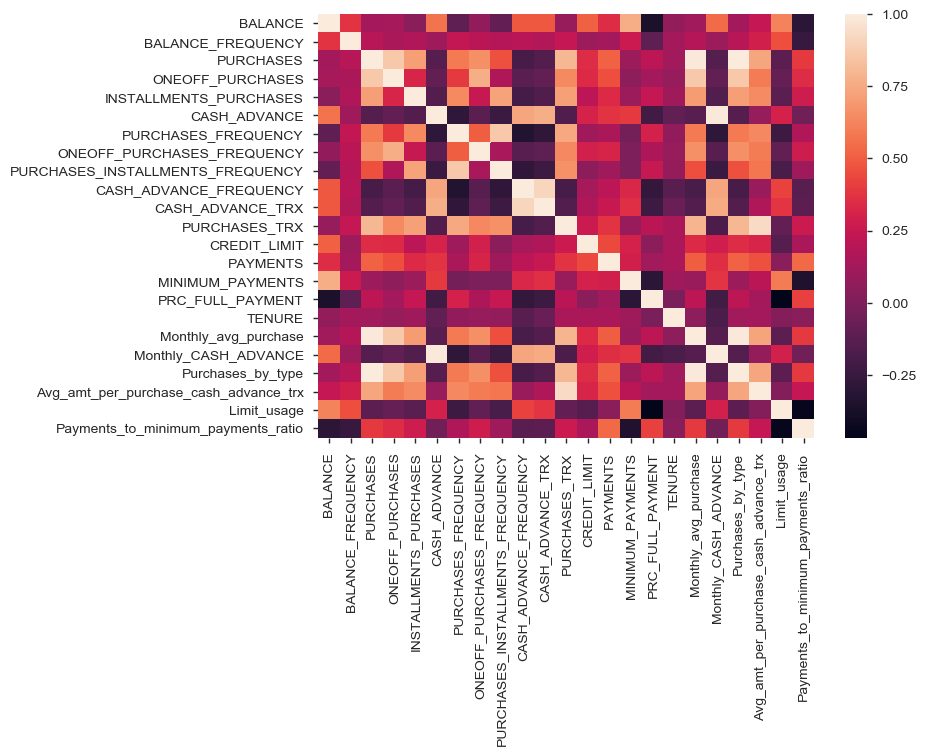

In [42]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data_num.corr())

In [43]:
#Handling missings - Method2
def Cat_Missing_imputation(x):
    x = x.fillna(x.mode())
    return x

data_cat=data_cat.apply(lambda x: Cat_Missing_imputation(x))
data_cat

""
0
1
2
3
4
5
6
7
8
9


In [44]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in data_cat.columns:
    data_cat[c_feature] = data_cat[c_feature].astype('category')
    data_cat = create_dummies(data_cat , c_feature )

In [45]:
data_cat.head()

""
0
1
2
3
4


In [46]:
#car_sales=pd.concat(car_sales_num, car_sales_cat)
data_new = pd.concat([data_num, data_cat], axis=1)

data_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_CASH_ADVANCE,Purchases_by_type,Avg_amt_per_purchase_cash_advance_trx,Limit_usage,Payments_to_minimum_payments_ratio
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,7.950000,0.000000,95.40,2,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,0.000000,425.548562,0.00,4,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,64.430833,0.000000,773.17,12,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,89.988924,643.387510,0.000000,12,124.916667,17.149001,1499.00,2,0.222223,4.754748
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,1.333333,0.000000,16.00,1,0.681429,2.771075


In [47]:
sc=StandardScaler()

data_new_scaled=sc.fit_transform(data_num)
data_new_scaled

C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\RAMKUMAR\Documents\Python Scripts\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.83578259, -0.29790382, -0.66238867, ..., -0.85347452,
        -0.99003536, -0.59394024],
       [ 1.03625747,  0.11829617, -0.74913553, ..., -0.73114247,
         0.21211872, -0.1666981 ],
       [ 0.61743705,  0.53449616, -0.04609497, ..., -0.24181425,
        -0.14803824, -0.67559697],
       ...,
       [-0.846146  , -0.22853944, -0.61783315, ..., -0.66997644,
        -1.04054055, -0.67660336],
       [-0.85203237, -0.22853944, -0.74913553, ..., -0.85347452,
        -1.03039323, -0.68442581],
       [-0.63931145, -0.99157046,  0.24495256, ...,  0.5533441 ,
        -0.21180129, -0.72519172]])

In [48]:
pd.DataFrame(data_new_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.835783,-0.297904,-0.662389,-0.600394,-0.483999,-0.605707,-0.806490,-0.678661,-0.707313,-0.722502,...,-0.800356,-7.047677e-01,-0.525551,0.378995,-0.672440,-0.600126,-0.662638,-0.853475,-0.990035,-5.939402e-01
1,1.036257,0.118296,-0.749136,-0.600394,-0.675642,2.838929,-1.221758,-0.678661,-0.916995,0.692644,...,1.643245,5.999710e-01,0.234227,0.378995,-0.757187,2.868023,-0.749390,-0.731142,0.212119,-1.666981e-01
2,0.617437,0.534496,-0.046095,0.435900,-0.675642,-0.605707,1.269843,2.673451,-0.916995,-0.722502,...,-0.537116,-2.252268e-02,-0.525551,0.378995,-0.070357,-0.600126,-0.046310,-0.241814,-0.148038,-6.755970e-01
3,0.126875,-1.130304,0.613899,1.408742,-0.675642,-0.453170,-1.014125,-0.399319,-0.916995,-0.250789,...,-0.870392,-1.590124e-16,-0.525551,0.378995,0.574420,-0.460364,0.613722,-0.853475,-0.466800,-1.435121e-14
4,-0.375812,0.534496,-0.734587,-0.578948,-0.675642,-0.605707,-1.014125,-0.399319,-0.916995,-0.722502,...,-0.501872,-5.575118e-01,-0.525551,0.378995,-0.742974,-0.600126,-0.734841,-0.914641,0.858316,-3.561361e-01


In [49]:
pd.DataFrame(data_new_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,...,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,1.585820e-16,-6.460754e-15,5.124641e-15,1.072175e-14,-4.120131e-15,1.343209e-15,-3.716084e-16,2.021052e-15,2.353921e-16,9.352668e-16,...,2.836961e-16,-2.170641e-15,-2.201566e-15,2.564970e-14,-3.022412e-15,-1.857800e-15,-3.547752e-17,2.622483e-16,3.347540e-16,-3.853528e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,...,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-8.547816e-01,-2.795108e+00,-7.491355e-01,-6.003935e-01,-6.756417e-01,-6.057071e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-7.225024e-01,...,-8.703917e-01,-7.973997e-01,-5.255510e-01,-3.266360e+00,-7.571870e-01,-6.001256e-01,-7.493902e-01,-9.146405e-01,-1.099570e+00,-7.720296e-01
25%,-7.840421e-01,2.580728e-02,-7.130956e-01,-6.003935e-01,-6.756417e-01,-6.057071e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-7.225024e-01,...,-6.866864e-01,-6.609218e-01,-5.255510e-01,3.789947e-01,-7.209497e-01,-6.001256e-01,-7.131913e-01,-7.311425e-01,-9.882121e-01,-6.786071e-01
50%,-3.428484e-01,5.344962e-01,-4.206250e-01,-5.494615e-01,-4.968559e-01,-6.057071e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-7.225024e-01,...,-3.900233e-01,-4.304591e-01,-5.255510e-01,3.789947e-01,-4.167433e-01,-6.001256e-01,-4.198243e-01,-3.641463e-01,-2.337552e-01,-4.323495e-01
75%,3.563051e-01,5.344962e-01,2.603015e-01,1.735125e-01,2.657711e-01,2.198943e-01,1.062211e+00,3.269728e-01,9.701506e-01,5.354039e-01,...,2.640491e-01,2.032657e-01,-3.712234e-02,3.789947e-01,2.792633e-01,2.074019e-01,2.601043e-01,3.086800e-01,9.626118e-01,2.284218e-01
max,2.638927e+00,5.344962e-01,2.886794e+00,2.979721e+00,2.839985e+00,2.838929e+00,1.269843e+00,2.673451e+00,1.599199e+00,2.579503e+00,...,2.882860e+00,2.969660e+00,2.893453e+00,3.789947e-01,2.859205e+00,2.868023e+00,2.886747e+00,2.816487e+00,1.681497e+00,2.995248e+00


In [50]:
pc = PCA(n_components=23)

In [51]:
pc.fit(data_new_scaled)

PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
pc.explained_variance_

array([7.88110834e+00, 5.11936907e+00, 2.20580535e+00, 1.54859567e+00,
       1.17376718e+00, 9.26240677e-01, 8.37653535e-01, 7.14699545e-01,
       5.44508067e-01, 4.86939928e-01, 3.77266149e-01, 2.87774992e-01,
       2.25112337e-01, 2.14040688e-01, 1.69741906e-01, 1.06418914e-01,
       7.99016870e-02, 4.94191966e-02, 2.85667376e-02, 1.38270336e-02,
       7.26578311e-03, 4.52470318e-03, 2.26336060e-05])

In [53]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

In [54]:
var

array([3.42618599e-01, 2.22556394e-01, 9.58938648e-02, 6.73227235e-02,
       5.10276537e-02, 4.02668342e-02, 3.64156497e-02, 3.10704213e-02,
       2.36716186e-02, 2.11689357e-02, 1.64010433e-02, 1.25105582e-02,
       9.78639933e-03, 9.30507709e-03, 7.37925827e-03, 4.62639235e-03,
       3.47359824e-03, 2.14842065e-03, 1.24189330e-03, 6.01108202e-04,
       3.15868317e-04, 1.96704245e-04, 9.83959876e-07])

In [55]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [56]:
var1

array([ 34.26,  56.52,  66.11,  72.84,  77.94,  81.97,  85.61,  88.72,
        91.09,  93.21,  94.85,  96.1 ,  97.08,  98.01,  98.75,  99.21,
        99.56,  99.77,  99.89,  99.95,  99.98, 100.  , 100.  ])

# number of components have choosen as 06 based on cumulative variance is explaining >75 % and individual component explaining >0.8 variance

In [57]:
pc_final=PCA(n_components=7).fit(data_new_scaled)

In [58]:
pc_final.explained_variance_

array([7.88110834, 5.11936907, 2.20580535, 1.54859567, 1.17376718,
       0.92624068, 0.83765353])

In [59]:
reduced_cr=pc_final.fit_transform(data_new_scaled)  # the out put is Factors (F1, F2, ...F9)

In [60]:
dimensions = pd.DataFrame(reduced_cr)

In [61]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5", "C6","C7"]

In [62]:
dimensions.head()

,C1,C2,C3,C4,C5,C6,C7
0,-2.133532,-2.185876,-0.203229,0.494204,-0.105656,-0.238491,-0.172981
1,-2.427169,3.403139,1.909208,-0.323188,-1.399668,0.102606,0.199690
2,0.775740,-0.380632,-0.921062,2.052190,0.188095,-0.091770,2.336594
3,-0.236245,-0.578910,0.729320,2.322725,-0.409397,1.035466,0.029598
4,-2.299184,-1.260105,-0.949360,1.124625,0.113222,-0.770511,-0.569882


In [63]:
dimensions.to_csv("dimensions.csv")

In [64]:
#pc_final.components_

#print pd.DataFrame(pc_final.components_,columns=telco_num.columns).T

Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=data_num.columns).T
Loadings

,0,1,2,3,4,5,6
BALANCE,0.037433,0.846500,-0.248222,0.156146,-0.204972,0.207176,0.070971
BALANCE_FREQUENCY,0.209504,0.384438,-0.502277,-0.014700,0.128053,-0.403182,0.205042
PURCHASES,0.946551,0.112384,0.043509,0.157590,0.073846,0.066095,-0.122491
ONEOFF_PURCHASES,0.787588,0.145081,0.149432,0.455179,0.222195,-0.001950,0.037808
INSTALLMENTS_PURCHASES,0.763717,0.004461,-0.152882,-0.379389,-0.158769,0.118081,-0.248246
CASH_ADVANCE,-0.224816,0.828568,0.323064,-0.226053,-0.008540,0.016648,0.057651
PURCHASES_FREQUENCY,0.762850,-0.173791,-0.264031,-0.375276,0.040723,-0.001940,0.204952
ONEOFF_PURCHASES_FREQUENCY,0.701677,0.080626,0.075620,0.366939,0.274022,-0.139921,0.334855
PURCHASES_INSTALLMENTS_FREQUENCY,0.635500,-0.163867,-0.325692,-0.608106,-0.111271,0.060041,-0.002484
CASH_ADVANCE_FREQUENCY,-0.287523,0.784079,0.183802,-0.201088,0.230391,-0.195176,0.004922


In [65]:
Loadings.to_csv("Loadings.csv")

CASH_ADVANCE
PURCHASES
Purchases_by_type
ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES
CREDIT_LIMIT
MINIMUM_PAYMENTS
BALANCE
PAYMENTS


# Clustering

In [66]:
list_var = ['PURCHASES','CASH_ADVANCE','Payments_to_minimum_payments_ratio','Monthly_avg_purchase',
'PURCHASES_INSTALLMENTS_FREQUENCY','TENURE','Purchases_by_type','BALANCE','Limit_usage']
list_var

['PURCHASES',
 'CASH_ADVANCE',
 'Payments_to_minimum_payments_ratio',
 'Monthly_avg_purchase',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'TENURE',
 'Purchases_by_type',
 'BALANCE',
 'Limit_usage']

In [67]:
data_new_scaled1=pd.DataFrame(data_new_scaled, columns=data_num.columns)
data_new_scaled1.head(5)

data_new_scaled2=data_new_scaled1[list_var]
data_new_scaled2.head(5)

,PURCHASES,CASH_ADVANCE,Payments_to_minimum_payments_ratio,Monthly_avg_purchase,PURCHASES_INSTALLMENTS_FREQUENCY,TENURE,Purchases_by_type,BALANCE,Limit_usage
0,-0.662389,-0.605707,-5.939402e-01,-0.672440,-0.707313,0.378995,-0.662638,-0.835783,-0.990035
1,-0.749136,2.838929,-1.666981e-01,-0.757187,-0.916995,0.378995,-0.749390,1.036257,0.212119
2,-0.046095,-0.605707,-6.755970e-01,-0.070357,-0.916995,0.378995,-0.046310,0.617437,-0.148038
3,0.613899,-0.453170,-1.435121e-14,0.574420,-0.916995,0.378995,0.613722,0.126875,-0.466800
4,-0.734587,-0.605707,-3.561361e-01,-0.742974,-0.916995,0.378995,-0.734841,-0.375812,0.858316


In [68]:
km_3=KMeans(n_clusters=3,random_state=123)
km_3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [69]:
km_3.fit(data_new_scaled2)
#km_4.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [70]:
km_3.labels_

array([2, 1, 1, ..., 2, 2, 2])

In [71]:
km_3.cluster_centers_

array([[ 2.02530421, -0.20885021,  0.84160567,  2.01162417,  0.84659995,
         0.21317804,  2.02523951,  0.29275808, -0.18397467],
       [-0.47007312,  0.56734913, -0.49847162, -0.4706329 , -0.44080047,
        -0.02327789, -0.4701595 ,  0.64563468,  0.97658308],
       [-0.28935192, -0.43020343,  0.14852466, -0.28408605,  0.09565139,
        -0.05368632, -0.28925278, -0.67449885, -0.80170861]])

In [72]:
pd.Series(km_3.labels_).value_counts()

2    4004
1    3550
0    1396
dtype: int64

In [73]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

2    0.447374
1    0.396648
0    0.155978
dtype: float64

In [74]:
km_4=KMeans(n_clusters=4,random_state=123).fit(data_new_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(data_new_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(data_new_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(data_new_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(data_new_scaled2)
#km_5.labels_

In [75]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([telco_num,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

# save the cluster labels and sort by cluster
data_num['cluster_3'] = km_3.labels_
data_num['cluster_4'] = km_4.labels_
data_num['cluster_5'] = km_5.labels_
data_num['cluster_6'] = km_6.labels_
data_num['cluster_7'] = km_7.labels_
data_num['cluster_8'] = km_8.labels_

In [76]:
data_num.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Purchases_by_type,Avg_amt_per_purchase_cash_advance_trx,Limit_usage,Payments_to_minimum_payments_ratio,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,95.40,2,0.040901,1.446508,2,1,2,4,0,2
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0.00,4,0.457495,3.826241,1,2,3,3,4,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,773.17,12,0.332687,0.991682,1,2,0,1,6,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1499.00,2,0.222223,4.754748,2,1,2,4,0,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,16.00,1,0.681429,2.771075,1,2,0,1,6,0


In [77]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

2    0.447374
1    0.396648
0    0.155978
dtype: float64

In [78]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

1    0.401117
2    0.359665
0    0.150391
3    0.088827
dtype: float64

In [79]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

2    0.376648
0    0.265251
1    0.148156
3    0.123464
4    0.086480
dtype: float64

In [80]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

4    0.244916
1    0.233184
0    0.191397
2    0.131173
3    0.118212
5    0.081117
dtype: float64

In [81]:
pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts())

0    0.241899
6    0.230168
5    0.184469
4    0.115866
3    0.081117
2    0.073408
1    0.073073
dtype: float64

In [82]:
pd.Series(km_8.labels_).value_counts()/sum(pd.Series(km_8.labels_).value_counts())

0    0.219777
2    0.213408
5    0.176313
1    0.112402
6    0.079777
4    0.072514
3    0.067598
7    0.058212
dtype: float64

# Choosing number clusters using Silhouette Coefficient

In [83]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(data_new_scaled2, km_8.labels_)

0.2807353568751714

In [84]:
# calculate SC for K=3 through K=12
k_range = range(3, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(data_new_scaled2)
    scores.append(metrics.silhouette_score(data_new_scaled2, km.labels_))

In [85]:
scores

[0.2681157537516207,
 0.2918602510483235,
 0.2860105249240476,
 0.26895450423800915,
 0.2759486895470152,
 0.2807353568751714]

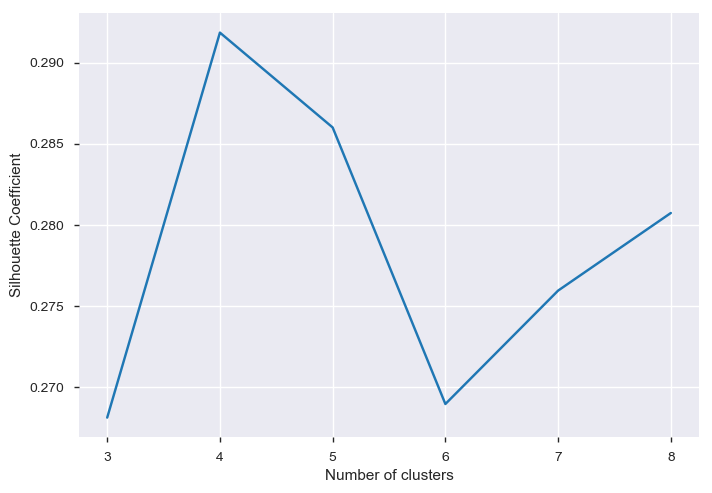

In [86]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [87]:
data_num.cluster_3.value_counts()/sum(data_num.cluster_3.value_counts())

2    0.447374
1    0.396648
0    0.155978
Name: cluster_3, dtype: float64

In [88]:
data_num.cluster_4.value_counts()/sum(data_num.cluster_4.value_counts())

1    0.401117
2    0.359665
0    0.150391
3    0.088827
Name: cluster_4, dtype: float64

In [89]:
data_num.cluster_5.value_counts()/sum(data_num.cluster_5.value_counts())

2    0.376648
0    0.265251
1    0.148156
3    0.123464
4    0.086480
Name: cluster_5, dtype: float64

In [90]:
data_num.cluster_6.value_counts()/sum(data_num.cluster_6.value_counts())

4    0.244916
1    0.233184
0    0.191397
2    0.131173
3    0.118212
5    0.081117
Name: cluster_6, dtype: float64

In [91]:
data_num.cluster_7.value_counts()/sum(data_num.cluster_7.value_counts())

0    0.241899
6    0.230168
5    0.184469
4    0.115866
3    0.081117
2    0.073408
1    0.073073
Name: cluster_7, dtype: float64

In [92]:
data_num.cluster_8.value_counts()/sum(data_num.cluster_8.value_counts())

0    0.219777
2    0.213408
5    0.176313
1    0.112402
6    0.079777
4    0.072514
3    0.067598
7    0.058212
Name: cluster_8, dtype: float64

# Finding Optimal number of clusters (optional)

# Elbow Analysis

In [93]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( data_new_scaled2 )
    cluster_errors.append( clusters.inertia_ )

In [94]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,80550.000000
1,2,57301.783880
2,3,44964.831936
3,4,38594.534179
4,5,33521.339970
5,6,30152.309539
6,7,26906.265056
7,8,24738.053837
8,9,22909.781236
9,10,21349.326396


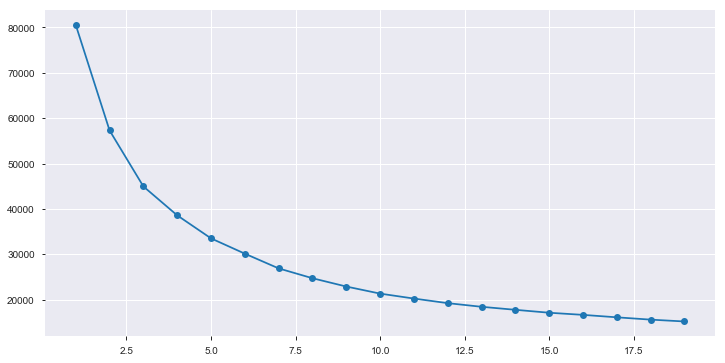

In [95]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# DBSCAN clustering

# Density-based spatial clustering of applications with noise (DBSCAN)

In [96]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2.05, min_samples=10)
db.fit(data_new_scaled2)

DBSCAN(algorithm='auto', eps=2.05, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=None, p=None)

In [97]:
pd.Series(db.labels_).value_counts()

 0    8935
-1      15
dtype: int64

In [98]:
# review the cluster labels
db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
# save the cluster labels and sort by cluster
data_num['DB_cluster'] = db.labels_

In [100]:
# review the cluster centers
DBSCAN_clustering = data_num.groupby('DB_cluster').mean()
DBSCAN_clustering

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Purchases_by_type,Avg_amt_per_purchase_cash_advance_trx,Limit_usage,Payments_to_minimum_payments_ratio,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
DB_cluster,,,,,,,,,,,,,,,,,,,,,
-1,4278.005427,0.933889,2950.279833,2070.106533,613.563667,3692.015217,0.656137,0.470423,0.340741,0.350952,...,2950.279833,30.400000,0.656796,4.328690,0.066667,0.600000,1.533333,2.466667,2.266667,4.066667
0,1447.655991,0.883167,820.293212,445.225465,335.870633,812.334866,0.490072,0.202008,0.364477,0.127263,...,820.526746,15.929155,0.383530,4.755463,1.293453,1.388248,1.617907,2.235031,3.231673,2.797650


In [122]:
DBSCAN_clustering.T

DB_cluster,-1,0
BALANCE,4278.005427,1447.655991
BALANCE_FREQUENCY,0.933889,0.883167
PURCHASES,2950.279833,820.293212
ONEOFF_PURCHASES,2070.106533,445.225465
INSTALLMENTS_PURCHASES,613.563667,335.870633
CASH_ADVANCE,3692.015217,812.334866
PURCHASES_FREQUENCY,0.656137,0.490072
ONEOFF_PURCHASES_FREQUENCY,0.470423,0.202008
PURCHASES_INSTALLMENTS_FREQUENCY,0.340741,0.364477
CASH_ADVANCE_FREQUENCY,0.350952,0.127263


In [123]:
DBSCAN_clustering.T.to_csv("DBSCAN_clustering.T.csv")

# Profiling

In [102]:
data_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Avg_amt_per_purchase_cash_advance_trx,Limit_usage,Payments_to_minimum_payments_ratio,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,DB_cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,0.040901,1.446508,2,1,2,4,0,2,0
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,4,0.457495,3.826241,1,2,3,3,4,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,0.332687,0.991682,1,2,0,1,6,2,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,2,0.222223,4.754748,2,1,2,4,0,2,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,0.681429,2.771075,1,2,0,1,6,0,0


In [103]:
data_num.cluster_3.value_counts()/1000

2    4.004
1    3.550
0    1.396
Name: cluster_3, dtype: float64

In [104]:
data_num.cluster_3.value_counts()*100/sum(data_num.cluster_3.value_counts())

2    44.737430
1    39.664804
0    15.597765
Name: cluster_3, dtype: float64

In [105]:
pd.Series.sort_index(data_num.cluster_5.value_counts())

0    2374
1    1326
2    3371
3    1105
4     774
Name: cluster_5, dtype: int64

In [106]:
data_num.cluster_3.size

8950

In [107]:
size=pd.concat([pd.Series(data_num.cluster_3.size), pd.Series.sort_index(data_num.cluster_3.value_counts()), pd.Series.sort_index(data_num.cluster_4.value_counts()),
           pd.Series.sort_index(data_num.cluster_5.value_counts()), pd.Series.sort_index(data_num.cluster_6.value_counts()),
           pd.Series.sort_index(data_num.cluster_7.value_counts()), pd.Series.sort_index(data_num.cluster_8.value_counts())])

In [108]:
size

0    8950
0    1396
1    3550
2    4004
0    1346
1    3590
2    3219
3     795
0    2374
1    1326
2    3371
3    1105
4     774
0    1713
1    2087
2    1174
3    1058
4    2192
5     726
0    2165
1     654
2     657
3     726
4    1037
5    1651
6    2060
0    1967
1    1006
2    1910
3     605
4     649
5    1578
6     714
7     521
dtype: int64

In [109]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/data_num.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950,1396,3550,4004,1346,3590,3219,795,2374,1326,...,1651,2060,1967,1006,1910,605,649,1578,714,521


In [110]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.155978,0.396648,0.447374,0.150391,0.401117,0.359665,0.088827,0.265251,0.148156,...,0.184469,0.230168,0.219777,0.112402,0.213408,0.067598,0.072514,0.176313,0.079777,0.058212


In [111]:
data_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Avg_amt_per_purchase_cash_advance_trx,Limit_usage,Payments_to_minimum_payments_ratio,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,DB_cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,0.040901,1.446508,2,1,2,4,0,2,0
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,4,0.457495,3.826241,1,2,3,3,4,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,0.332687,0.991682,1,2,0,1,6,2,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,2,0.222223,4.754748,2,1,2,4,0,2,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,0.681429,2.771075,1,2,0,1,6,0,0


In [112]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([data_num.apply(lambda x: x.mean()).T, data_num.groupby('cluster_3').apply(lambda x: x.mean()).T, data_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
          data_num.groupby('cluster_5').apply(lambda x: x.mean()).T, data_num.groupby('cluster_6').apply(lambda x: x.mean()).T,
          data_num.groupby('cluster_7').apply(lambda x: x.mean()).T, data_num.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [113]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE,1452.399593,1946.819666,2542.769995,313.282373,1960.611891,325.820785,2616.207367,966.949206,1882.425007,1956.244235,...,438.861285,1934.245985,1941.216574,4204.601492,408.549767,677.615284,3561.789674,462.448049,769.382779,325.917714
BALANCE_FREQUENCY,0.883252,0.962993,0.972820,0.776038,0.964004,0.783241,0.982536,0.796144,0.987601,0.963598,...,0.910985,0.993124,0.993169,0.968527,0.738229,0.941299,0.988794,0.925181,0.796594,0.628153
PURCHASES,823.863022,3051.194639,306.899338,505.647772,3096.822033,529.675148,320.506483,342.147723,330.028875,3113.287176,...,837.840067,294.982932,293.836396,305.470815,300.669581,3249.415367,3106.393388,857.655564,349.206106,632.161363
ONEOFF_PURCHASES,447.948730,1743.165023,174.266687,239.019985,1767.977810,250.790816,180.411404,186.615925,181.245977,1784.027468,...,248.328528,169.742277,166.920107,185.496938,229.542576,1902.213174,1755.668108,259.623194,189.141204,423.749040
INSTALLMENTS_PURCHASES,336.336040,1053.577801,132.657903,266.852496,1065.045273,279.033293,140.100103,155.905494,148.916430,1061.709061,...,587.042647,125.496981,127.184733,119.762438,71.276194,1059.957988,1078.332230,595.206925,160.480991,208.223594
CASH_ADVANCE,817.161146,535.400716,1582.573506,236.772454,532.654039,228.660456,1502.132868,1182.871921,523.167144,506.274415,...,119.812194,503.191321,494.896706,3621.828299,300.232551,234.762463,880.687905,108.074453,978.294289,1037.400463
PURCHASES_FREQUENCY,0.490351,0.889599,0.285795,0.532514,0.892710,0.537452,0.290386,0.406092,0.322821,0.892411,...,0.888984,0.306106,0.308918,0.237132,0.279631,0.896287,0.886973,0.895028,0.422602,0.338490
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.576434,0.111946,0.152319,0.583234,0.159077,0.113758,0.112815,0.121199,0.587946,...,0.159709,0.116175,0.115284,0.102501,0.160148,0.649001,0.541562,0.166319,0.115132,0.167870
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.700898,0.189252,0.402452,0.703718,0.408129,0.195059,0.278533,0.220571,0.700883,...,0.821788,0.202659,0.206587,0.148265,0.114526,0.677101,0.723955,0.827117,0.290333,0.183257
CASH_ADVANCE_FREQUENCY,0.127637,0.077017,0.239070,0.046488,0.075865,0.040975,0.228607,0.197803,0.154328,0.073490,...,0.028640,0.156672,0.155569,0.378432,0.062018,0.036329,0.123103,0.027409,0.183180,0.117618


In [114]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [115]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.000000,1396.000000,3550.000000,4004.000000,1346.000000,3590.000000,3219.000000,795.000000,2374.000000,1326.000000,...,1651.000000,2060.000000,1967.000000,1006.000000,1910.000000,605.000000,649.000000,1578.000000,714.000000,521.000000
Seg_Pct,1.000000,0.155978,0.396648,0.447374,0.150391,0.401117,0.359665,0.088827,0.265251,0.148156,...,0.184469,0.230168,0.219777,0.112402,0.213408,0.067598,0.072514,0.176313,0.079777,0.058212
BALANCE,1452.399593,1946.819666,2542.769995,313.282373,1960.611891,325.820785,2616.207367,966.949206,1882.425007,1956.244235,...,438.861285,1934.245985,1941.216574,4204.601492,408.549767,677.615284,3561.789674,462.448049,769.382779,325.917714
BALANCE_FREQUENCY,0.883252,0.962993,0.972820,0.776038,0.964004,0.783241,0.982536,0.796144,0.987601,0.963598,...,0.910985,0.993124,0.993169,0.968527,0.738229,0.941299,0.988794,0.925181,0.796594,0.628153
PURCHASES,823.863022,3051.194639,306.899338,505.647772,3096.822033,529.675148,320.506483,342.147723,330.028875,3113.287176,...,837.840067,294.982932,293.836396,305.470815,300.669581,3249.415367,3106.393388,857.655564,349.206106,632.161363
ONEOFF_PURCHASES,447.948730,1743.165023,174.266687,239.019985,1767.977810,250.790816,180.411404,186.615925,181.245977,1784.027468,...,248.328528,169.742277,166.920107,185.496938,229.542576,1902.213174,1755.668108,259.623194,189.141204,423.749040
INSTALLMENTS_PURCHASES,336.336040,1053.577801,132.657903,266.852496,1065.045273,279.033293,140.100103,155.905494,148.916430,1061.709061,...,587.042647,125.496981,127.184733,119.762438,71.276194,1059.957988,1078.332230,595.206925,160.480991,208.223594
CASH_ADVANCE,817.161146,535.400716,1582.573506,236.772454,532.654039,228.660456,1502.132868,1182.871921,523.167144,506.274415,...,119.812194,503.191321,494.896706,3621.828299,300.232551,234.762463,880.687905,108.074453,978.294289,1037.400463
PURCHASES_FREQUENCY,0.490351,0.889599,0.285795,0.532514,0.892710,0.537452,0.290386,0.406092,0.322821,0.892411,...,0.888984,0.306106,0.308918,0.237132,0.279631,0.896287,0.886973,0.895028,0.422602,0.338490
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.576434,0.111946,0.152319,0.583234,0.159077,0.113758,0.112815,0.121199,0.587946,...,0.159709,0.116175,0.115284,0.102501,0.160148,0.649001,0.541562,0.166319,0.115132,0.167870


In [116]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [118]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,1396.000000,3550.000000,4004.000000,1346.000000,3590.000000,3219.000000,795.000000,2374.000000,1326.000000,...,1651.000000,2060.000000,1967.000000,1006.000000,1910.000000,605.000000,649.000000,1578.000000,714.000000,521.000000
Seg_Pct,1.000000,0.155978,0.396648,0.447374,0.150391,0.401117,0.359665,0.088827,0.265251,0.148156,...,0.184469,0.230168,0.219777,0.112402,0.213408,0.067598,0.072514,0.176313,0.079777,0.058212
BALANCE,1452.399593,1946.819666,2542.769995,313.282373,1960.611891,325.820785,2616.207367,966.949206,1882.425007,1956.244235,...,438.861285,1934.245985,1941.216574,4204.601492,408.549767,677.615284,3561.789674,462.448049,769.382779,325.917714
BALANCE_FREQUENCY,0.883252,0.962993,0.972820,0.776038,0.964004,0.783241,0.982536,0.796144,0.987601,0.963598,...,0.910985,0.993124,0.993169,0.968527,0.738229,0.941299,0.988794,0.925181,0.796594,0.628153
PURCHASES,823.863022,3051.194639,306.899338,505.647772,3096.822033,529.675148,320.506483,342.147723,330.028875,3113.287176,...,837.840067,294.982932,293.836396,305.470815,300.669581,3249.415367,3106.393388,857.655564,349.206106,632.161363
ONEOFF_PURCHASES,447.948730,1743.165023,174.266687,239.019985,1767.977810,250.790816,180.411404,186.615925,181.245977,1784.027468,...,248.328528,169.742277,166.920107,185.496938,229.542576,1902.213174,1755.668108,259.623194,189.141204,423.749040
INSTALLMENTS_PURCHASES,336.336040,1053.577801,132.657903,266.852496,1065.045273,279.033293,140.100103,155.905494,148.916430,1061.709061,...,587.042647,125.496981,127.184733,119.762438,71.276194,1059.957988,1078.332230,595.206925,160.480991,208.223594
CASH_ADVANCE,817.161146,535.400716,1582.573506,236.772454,532.654039,228.660456,1502.132868,1182.871921,523.167144,506.274415,...,119.812194,503.191321,494.896706,3621.828299,300.232551,234.762463,880.687905,108.074453,978.294289,1037.400463
PURCHASES_FREQUENCY,0.490351,0.889599,0.285795,0.532514,0.892710,0.537452,0.290386,0.406092,0.322821,0.892411,...,0.888984,0.306106,0.308918,0.237132,0.279631,0.896287,0.886973,0.895028,0.422602,0.338490
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.576434,0.111946,0.152319,0.583234,0.159077,0.113758,0.112815,0.121199,0.587946,...,0.159709,0.116175,0.115284,0.102501,0.160148,0.649001,0.541562,0.166319,0.115132,0.167870


In [119]:
Profling_output_final.to_csv('Profiling_output.csv')

# Assigning segments to new data (Predicting segment for new data)

In [120]:
new_cust = pd.read_csv("C:\\Users\\RAMKUMAR\\Desktop\\data_num_new_cust.csv")
new_cust.head()
new_cust_scaled=sc.transform(new_cust)
new_cust_scaled = pd.DataFrame(new_cust_scaled, columns=new_cust.columns)
new_cust_scaled = new_cust_scaled[list_var]
new_cust_scaled.head()
def kmeans_assignment(centroids, points):
    num_centroids, dim = centroids.shape
    num_points, _ = points.shape

  # Tile and reshape both arrays into `[num_points, num_centroids, dim]`.
    centroids = np.tile(centroids, [num_points, 1]).reshape([num_points, num_centroids, dim])
    points = np.tile(points, [1, num_centroids]).reshape([num_points, num_centroids, dim])

  # Compute all distances (for all points and all centroids) at once and 
  # select the min centroid for each point.
    distances = np.sum(np.square(centroids - points), axis=2)
    return np.argmin(distances, axis=1)
centroids = km_4.cluster_centers_
points = new_cust_scaled
kmeans_assignment(centroids, points)
new_cust['pred_segment'] = pd.Series(kmeans_assignment(centroids, points))
new_cust.head()